In [40]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
import random
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from fairlearn.metrics import MetricFrame, selection_rate


In [2]:
df1 = pd.read_csv('df1.csv')
df2 = pd.read_csv('df2.csv')
df3 = pd.read_csv('df3.csv')
df4 = pd.read_csv('df4.csv')
df5 = pd.read_csv('df5.csv')
df6 = pd.read_csv('df6.csv')
df7 = pd.read_csv('df7.csv')
df8 = pd.read_csv('df8.csv')
df9 = pd.read_csv('df9.csv')
df10 = pd.read_csv('df10.csv')
df11 = pd.read_csv('df11.csv')
df12 = pd.read_csv('df12.csv')

df = pd.concat([df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)


In [3]:
# Prepping for classification

df = df[df['Year'] == 2023]

df = df.drop(['SampleID', 'MRL_Not_Exceeded', 'Relative_MRL', 'MCL_Not_Exceeded', 
              'Relative_MCL', 'SamplePointName','CollectionDate', 'PWSName',
              'FacilityName', 'County', 'Year', 'MRL_Exceeded'], axis=1)

df.dropna(inplace=True)



In [24]:
df.head()
quantiles = df['Child_Poverty_Rate'].quantile([0.25, 0.5, 0.75])
quantiles

0.25    10.9
0.50    15.2
0.75    20.7
Name: Child_Poverty_Rate, dtype: float64

In [11]:
#Split into Training And Test sets

#Label
y = df['MCL_Exceeded']

#One-hot encode categorical vars
categorical_cols = ['Size', 'FacilityWaterType', 'Region', 'State', 'Contaminant', 'Month']
encoded = pd.get_dummies(df[categorical_cols], drop_first=True)
df_others = df.drop(columns=categorical_cols)

# Combine
X = pd.concat([df_others, encoded], axis=1)
X = X.drop('MCL_Exceeded', axis=1)

# Original Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=69)

# Under-sampling to esure proper training of models
rus = RandomUnderSampler(random_state=69)
X_train_bal, y_train_bal = rus.fit_resample(X_train, y_train)


/Users/copelandlaris/Documents/Spring 2025/Machine Learning/venv/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/Users/copelandlaris/Documents/Spring 2025/Machine Learning/venv/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


## Decision Tree

Accuracy: 0.8486267639634172
                precision    recall  f1-score   support

Not Exceed MCL       1.00      0.85      0.92    142560
    Exceed MCL       0.08      0.77      0.14      2426

      accuracy                           0.85    144986
     macro avg       0.54      0.81      0.53    144986
  weighted avg       0.98      0.85      0.90    144986



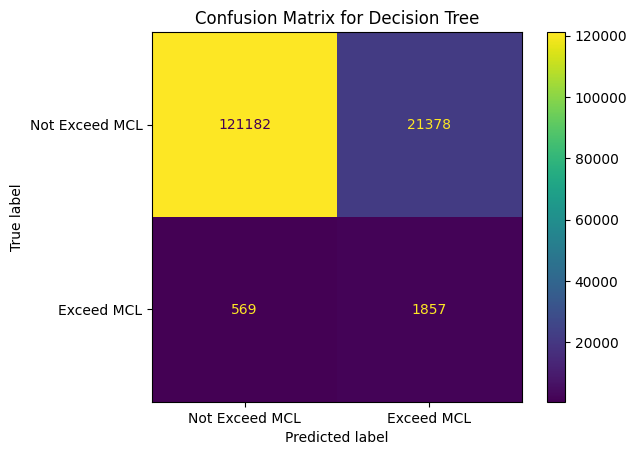

In [12]:
#Gini based Decision Tree with Same Data

# Train decision tree - minimizing split and depth to reduce overfitting
tree_model = DecisionTreeClassifier(max_depth= 5, min_samples_split=.01)
tree_model.fit(X_train_bal, y_train_bal)

# Predicting test set
y_pred = tree_model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Exceed MCL', 'Exceed MCL']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Exceed MCL', 'Exceed MCL'])
plt.title("Confusion Matrix for Decision Tree")
plt.show()

## Naive Bayes

Accuracy: 0.7955043935276509
                precision    recall  f1-score   support

Not Exceed MCL       0.99      0.80      0.88    142560
    Exceed MCL       0.06      0.72      0.10      2426

      accuracy                           0.80    144986
     macro avg       0.53      0.76      0.49    144986
  weighted avg       0.98      0.80      0.87    144986



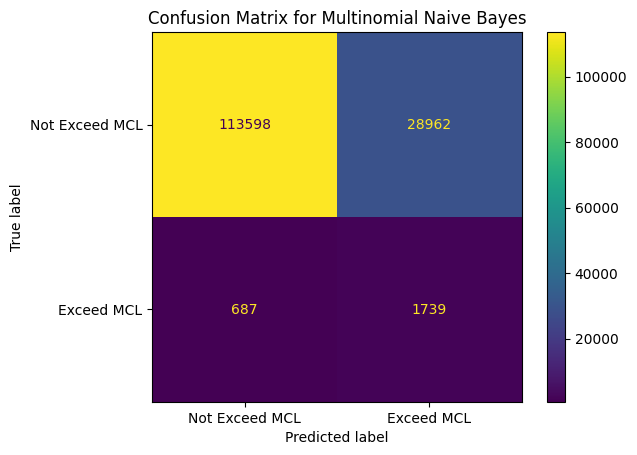

In [13]:
# Multinomial NB

# Training Multinomial NB
nb_model =MultinomialNB()
nb_model.fit(X_train_bal, y_train_bal)

# Predicting test set
y_pred = nb_model.predict(X_test)

# Evaluating model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=['Not Exceed MCL', 'Exceed MCL']))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Not Exceed MCL', 'Exceed MCL'])
plt.title("Confusion Matrix for Multinomial Naive Bayes")
plt.show()

## SVM

Accuracy: 0.9007076545321617
                precision    recall  f1-score   support

Not Exceed MCL       0.99      0.90      0.95    142560
    Exceed MCL       0.11      0.72      0.20      2426

      accuracy                           0.90    144986
     macro avg       0.55      0.81      0.57    144986
  weighted avg       0.98      0.90      0.93    144986



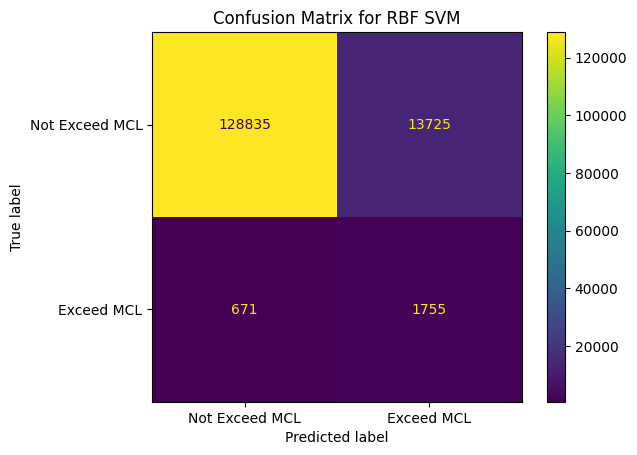

In [14]:
#Initialize SVM
#Setting kernel to linear and regularization to 1 to improve model performance and avoid overfitting
svm = SVC(kernel='rbf', gamma = 1, C=1.0)

# Fitting
svm.fit(X_train_bal, y_train_bal)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm, target_names=['Not Exceed MCL', 'Exceed MCL']))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svm, display_labels=['Not Exceed MCL', 'Exceed MCL'])
plt.title("Confusion Matrix for RBF SVM")
plt.show()

## Comparison

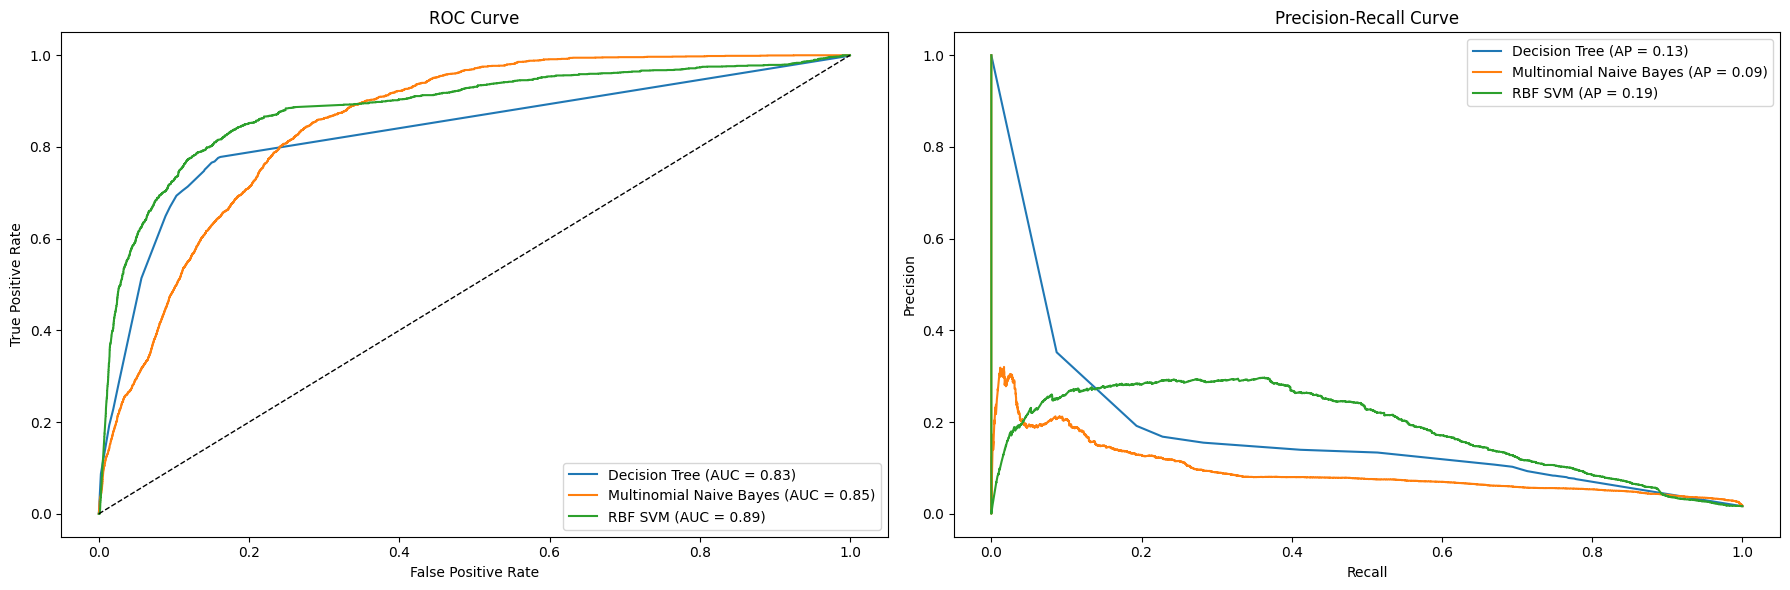

In [252]:
## ROC and PR Curves

model_outputs = {
    'Decision Tree': tree_model.predict_proba(X_test)[:, 1],
    'Multinomial Naive Bayes': nb_model.predict_proba(X_test)[:, 1],
    'RBF SVM': svm.decision_function(X_test),
}

plt.figure(figsize=(18, 6))

# ROC Curve
plt.subplot(1, 2, 1)
for name, scores in model_outputs.items():
    fpr, tpr, _ = roc_curve(y_test, scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# PR Curve
plt.subplot(1, 2, 2)
for name, scores in model_outputs.items():
    precision, recall, _ = precision_recall_curve(y_test, scores)
    pr_auc = average_precision_score(y_test, scores)
    plt.plot(recall, precision, label=f"{name} (AP = {pr_auc:.2f})")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Fairness Metric - Poverty Sub groups



Low Poverty Group:
Accuracy: 0.8542225950782998
                precision    recall  f1-score   support

Not Exceed MCL       0.99      0.86      0.92     34962
    Exceed MCL       0.11      0.78      0.19       798

      accuracy                           0.85     35760
     macro avg       0.55      0.82      0.56     35760
  weighted avg       0.97      0.85      0.90     35760



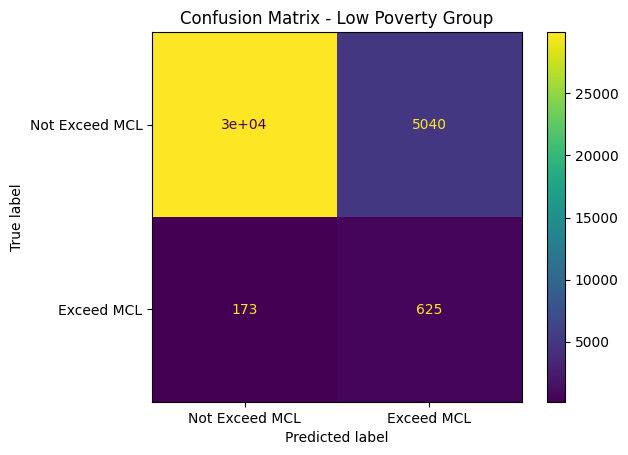


High Poverty Group:
Accuracy: 0.9372156505914467
                precision    recall  f1-score   support

Not Exceed MCL       1.00      0.94      0.97     35824
    Exceed MCL       0.13      0.69      0.21       443

      accuracy                           0.94     36267
     macro avg       0.56      0.82      0.59     36267
  weighted avg       0.99      0.94      0.96     36267



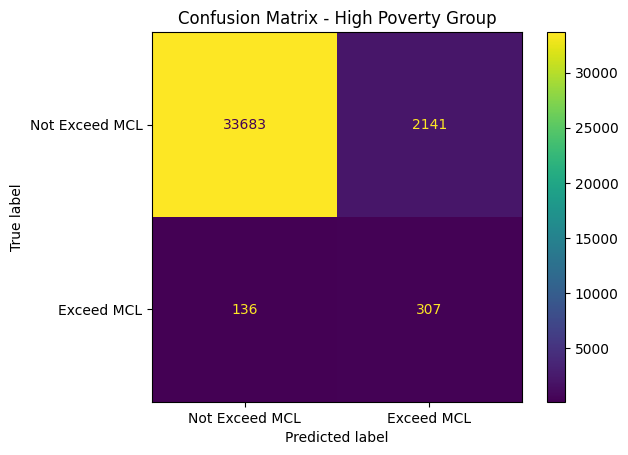

In [29]:

# Poverty groups based on upper and lower quartiles
low_poverty_mask = X_test['Poverty_Rate'] < 9.3
high_poverty_mask = X_test['Poverty_Rate'] >= 15.6

# Low poverty group
y_true_low = y_test[low_poverty_mask]
y_pred_low = y_pred_svm[low_poverty_mask]

# High poverty group
y_true_high = y_test[high_poverty_mask]
y_pred_high = y_pred_svm[high_poverty_mask]


# Low Poverty Group
print("\nLow Poverty Group:")
print("Accuracy:", accuracy_score(y_true_low, y_pred_low))
print(classification_report(y_true_low, y_pred_low, target_names=['Not Exceed MCL', 'Exceed MCL']))

cm_low = confusion_matrix(y_true_low, y_pred_low)
disp_low = ConfusionMatrixDisplay(confusion_matrix=cm_low, display_labels=['Not Exceed MCL', 'Exceed MCL'])
disp_low.plot()
plt.title("Confusion Matrix - Low Poverty Group")
plt.show()

# High Poverty Group
print("\nHigh Poverty Group:")
print("Accuracy:", accuracy_score(y_true_high, y_pred_high))
print(classification_report(y_true_high, y_pred_high, target_names=['Not Exceed MCL', 'Exceed MCL']))

cm_high = confusion_matrix(y_true_high, y_pred_high)
disp_high = ConfusionMatrixDisplay(confusion_matrix=cm_high, display_labels=['Not Exceed MCL', 'Exceed MCL'])
disp_high.plot()
plt.title("Confusion Matrix - High Poverty Group")
plt.show()

In [37]:
# Using fairlearn comparing the highest quartile poverty groups to others
sensitive_features = (X_test['Poverty_Rate'] >= 15.6).astype(int)

mf = MetricFrame(
    metrics={"accuracy": accuracy_score, "selection_rate": selection_rate},
    y_true=y_test,
    y_pred=y_pred_svm,
    sensitive_features=sensitive_features
)

print(mf.by_group)
print("Accuracy Difference:", mf.difference(method='between_groups'))

              accuracy  selection_rate
Poverty_Rate                          
0             0.888529        0.119869
1             0.937216        0.067499
Accuracy Difference: accuracy          0.048687
selection_rate    0.052369
dtype: float64
